# Exercício 19
Análise de Pinguins e História dos Oceanos Dataset do Kaggle: Palmer's Penguins </br>
https://www.kaggle.com/datasets/samybaladram/palmer s-penguin-dataset-extended </br>
O dataset de Palmer's Penguins contém informações sobre três espécies de pinguins, suas características físicas e o ambiente onde vivem. Imagine que você está trabalhando para um documentário sobre as mudanças climáticas e deseja usar os dados dos pinguins para contar uma história visual sobre como essas mudanças estão afetando essas aves marinhas.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

penguins_df = pd.read_csv('../palmerpenguins_extended.csv')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


# Análise de Pinguins e História dos Oceanos
### Tarefas
#### • Existem valores ausentes ou inconsistentes no dataset? Se sim, como você trataria esses dados para garantir a qualidade da análise?

In [18]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496,2023.348397
std,13.175171,2.774428,28.944765,1311.091310,1.313797
min,13.600000,9.100000,140.000000,2477.000000,2021.000000
25%,28.900000,16.600000,185.000000,3843.500000,2022.000000
50%,34.500000,18.400000,203.000000,4633.500000,2024.000000
75%,46.600000,20.300000,226.000000,5622.000000,2024.000000
max,88.200000,27.900000,308.000000,10549.000000,2025.000000


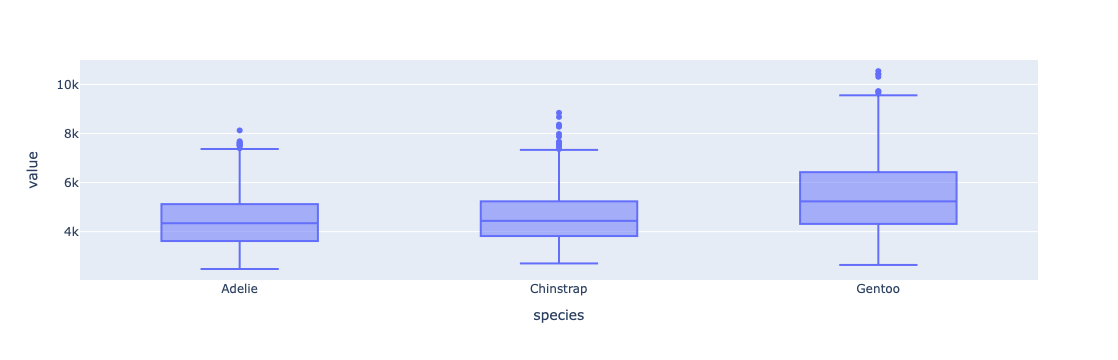

In [44]:
px.box(penguins_df, x='species', y=['body_mass_g'])